### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 8
### Due: Friday, Oct 27 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw8_data.npy`, which is a (3 x 20) numpy array. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e., just the likelihood x prior) on a grid of the linear coefficient (i.e., the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [ ]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood x prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this 1D posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model parameter dimension.

5) Using your 2D gridded likelihood x prior, compute the Bayesian evidence of the quadratic model. 

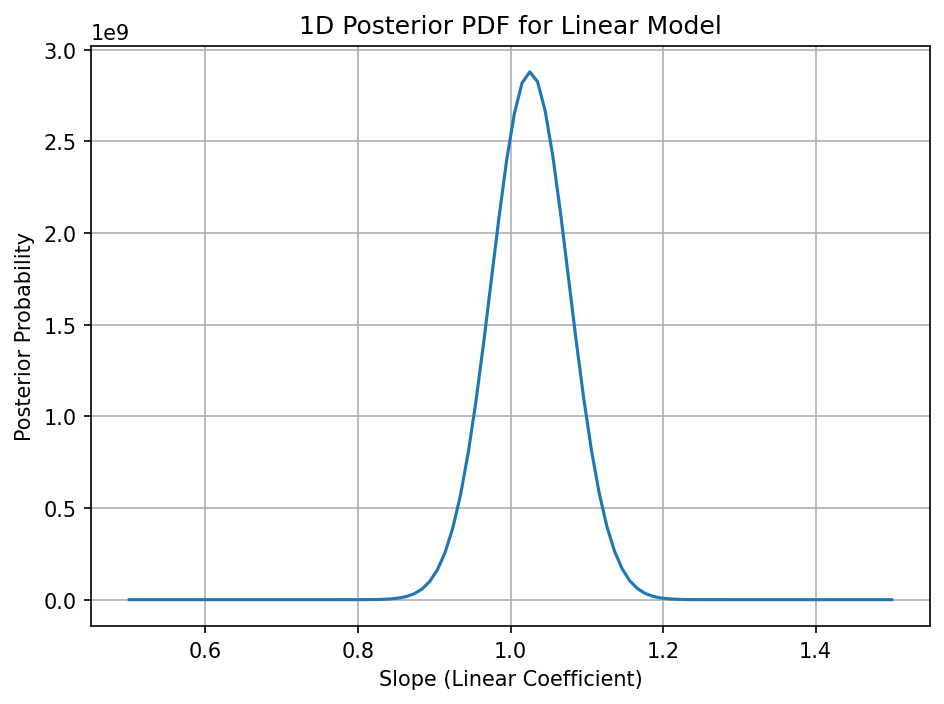

In [34]:
#Task 1

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Load the data from 'hw8_data.npy'
data = np.load('hw8_data.npy')
x, y, sigma_y = data

# Define the polynomial fit model and log-likelihood function
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

# Define the linear model with a fixed y-intercept
def linear_model(theta, x):
    return theta[0] + theta[1] * x

# Task 1: Compute and plot the 1D posterior pdf for the linear model
slope_range = np.linspace(0.5, 1.5, 100)
linear_posterior = np.exp([logL([-0.23, slope], data, model=linear_model) for slope in slope_range])

plt.plot(slope_range, linear_posterior)
plt.xlabel("Slope (Linear Coefficient)")
plt.ylabel("Posterior Probability")
plt.title("1D Posterior PDF for Linear Model")
plt.tight_layout()
plt.grid()
plt.show()


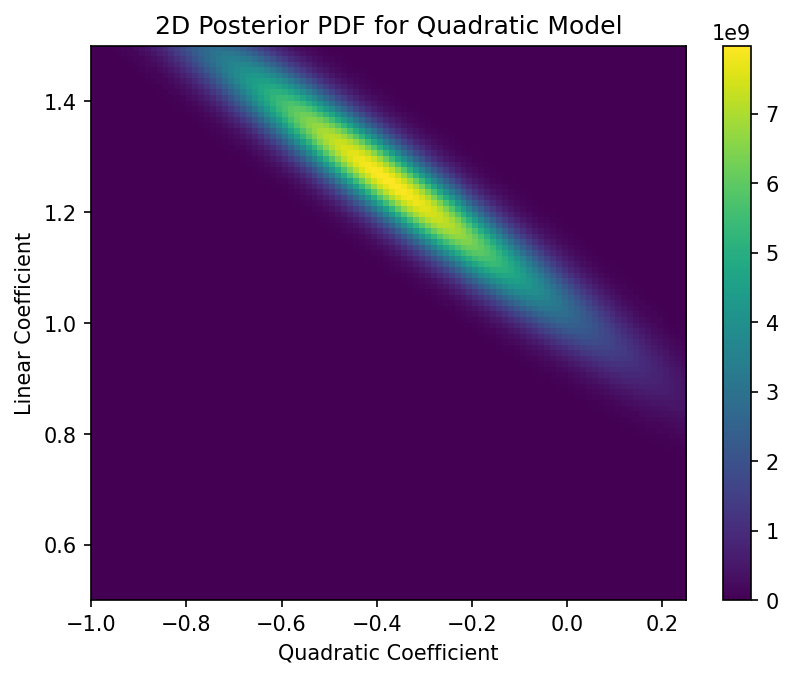

In [35]:
#Task 2

# Task 2: Compute and plot the 2D posterior pdf for the quadratic model
# Define the quadratic model with a fixed y-intercept
def quadratic_model(theta, x):
    return theta[0] + theta[1] * x + theta[2] * x**2

# Define the parameter grids
linear_range = np.linspace(0.5, 1.5, 100)
quadratic_range = np.linspace(-1, 0.25, 100)

# Compute the 2D posterior pdf
linear_prior = 1 / (1.5 - 0.5)  # Uniform prior for linear coefficient
quadratic_prior = 1 / (0.25 - (-1))  # Uniform prior for quadratic coefficient
quadratic_posterior = np.zeros((100, 100))

for i, linear_coeff in enumerate(linear_range):
    for j, quadratic_coeff in enumerate(quadratic_range):
        log_posterior = logL([-0.23, linear_coeff, quadratic_coeff], data, model=quadratic_model)
        quadratic_posterior[i, j] = np.exp(log_posterior)

# Plot the 2D posterior pdf for the quadratic model
plt.figure()
plt.imshow(quadratic_posterior, extent=[-1, 0.25, 0.5, 1.5], origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel("Quadratic Coefficient")
plt.ylabel("Linear Coefficient")
plt.title("2D Posterior PDF for Quadratic Model")
plt.show()


In [36]:
# Task 3: Compute the Bayesian evidence for both models
linear_evidence = np.trapz(linear_posterior, dx=(1.5 - 0.5) / 100)
quadratic_evidence = np.trapz(np.trapz(quadratic_posterior, dx=(0.25 - (-1)) / 100), dx=(1.5 - 0.5) / 100)

print(f"Bayesian Evidence for Linear Model: {linear_evidence:.3e}")
print(f"Bayesian Evidence for Quadratic Model: {quadratic_evidence:.3e}")


Bayesian Evidence for Linear Model: 3.620e+08
Bayesian Evidence for Quadratic Model: 6.008e+08
